In [ ]:
cd ..

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from networkx import gml

In [2]:
#graph = gml.read_gml('data/prot_clust_test.fasta.gml')
#nx.draw(graph, with_labels=True)
#plt.show()

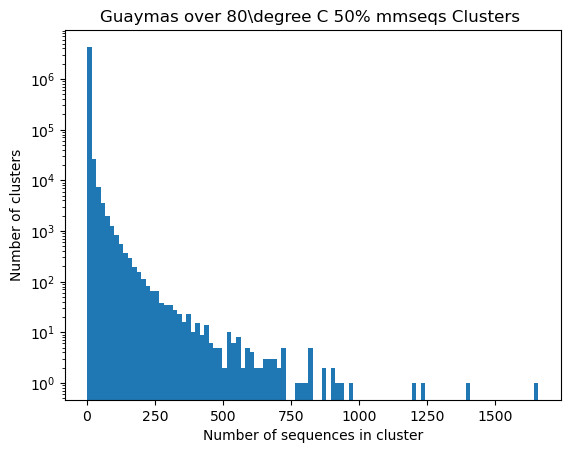

In [23]:
#Looking into the number of mmseqs clusters
#Went from 8,891,271 proteins to 4,328,200 clusters so about cut it in half, clustered at 50%, still lots of singleton clusters, could cluster at 30% instead? Maybe just go ahead and do that? 
import pandas as pd
#Read in the cluster tsv file
clusters = pd.read_csv('data/Guaymas2020_Scaffolds_Bins_deduplicated_hottest_greaterthan80C_mmseqsDB_clu_50.tsv', sep='\t', header=None)
clusters.head()
#Group by the cluster number and count the number of sequences in each cluster
cluster_counts = clusters.groupby(0).count()
cluster_counts.head()
#Sort the clusters by the number of sequences
cluster_counts.sort_values(by=1, ascending=False, inplace=True)
cluster_counts.head()


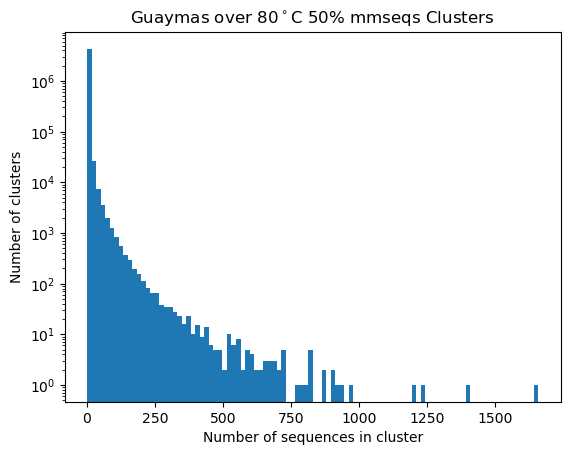

In [27]:
#Plot histogram of the number of sequences in each cluster
plt.hist(cluster_counts[1], bins=100)
#Make y axis log scale
plt.yscale('log')
plt.xlabel('Number of sequences in cluster')
plt.ylabel('Number of clusters')
plt.title('Guaymas over 80$^\circ$C 50% mmseqs Clusters ')
#plt.show()
#Write plot to png
plt.savefig('data/Guaymas_over_80C_50mmseqs_clusters_histogram.png')


In [5]:
cluster_counts.shape


(4328200, 1)

In [6]:
#Let's look for the GuapO cluster!
clusters.head()

,0,1
0,D4998_C1112_H2-scaffold_242977_1_100,D4998_C1112_H2-scaffold_242977_1_100
1,D4998_C1112_H2-scaffold_239615_8_100,D4998_C1112_H2-scaffold_239615_8_100
2,D4998_C1112_H2-scaffold_238930_1_100,D4998_C1112_H2-scaffold_238930_1_100
3,D4998_C1112_H2-scaffold_238985_4_100,D4998_C1112_H2-scaffold_238985_4_100
4,D4998_C1112_H2-scaffold_238985_4_100,D4994_C39_H2_Bin_54_scaffold_39422_14_99


In [22]:
clusters[clusters[0].str.contains('D4998_C1112_H3_Bin_236_scaffold_103142_8_115')] #Guaymas1 is a node of 3 that contains itself, D4994_C39_H1_Bin_323_scaffold_182250_2_89, and D4998_C1112_H2-scaffold_60242_2_100
#clusters[clusters[0].str.contains('D4994_C39_H1-scaffold_41179_3_89')] #Guaymas4 (D4994_C39_H2_Bin_234_scaffold_60347_1) is in a node called D4994_C39_H1-scaffold_41179_3_89 which has 2 members. 
#GuapO is NOT IN THIS DATASET because it is a lower temperature than 80C... voomph. The more I think about this, we got so lucky!!


,0,1
786951,D4998_C1112_H3_Bin_236_scaffold_103142_8_115,D4998_C1112_H3_Bin_236_scaffold_103142_8_115
786952,D4998_C1112_H3_Bin_236_scaffold_103142_8_115,D4994_C39_H1_Bin_323_scaffold_182250_2_89
786953,D4998_C1112_H3_Bin_236_scaffold_103142_8_115,D4998_C1112_H2-scaffold_60242_2_100


### Re-ran Operon Graph with 30% sequence similarity on all of the Guaymas 2020 data (deduplicated)

In [2]:
input_fp = 'data/Guaymas2020_Scaffolds_Bins_deduplicated_hottest_mmseqs_clu30.tsv'

In [3]:
#Looking into the number of mmseqs clusters
#Went from  26,904,368 proteins to , 7,368,354 clusters clustered at 30%,  
import pandas as pd
#Read in the cluster tsv file
clusters = pd.read_csv(input_fp, sep='\t', header=None)
clusters.head()
#Group by the cluster number and count the number of sequences in each cluster
cluster_counts = clusters.groupby(0).count()
cluster_counts.head()
#Sort the clusters by the number of sequences
cluster_counts.sort_values(by=1, ascending=False, inplace=True)
cluster_counts.head()


,1
0,
D4993_C5_H2-scaffold_11532_1_72,4472
D4993_C5_H3-scaffold_305190_1_33,3306
D4994_C39_H2-scaffold_13742_5_99,2636
D4993_C5_H1_Bin_367_scaffold_175031_3_29,2551
D4994_C39_H2_Bin_4_scaffold_80904_2_99,2296


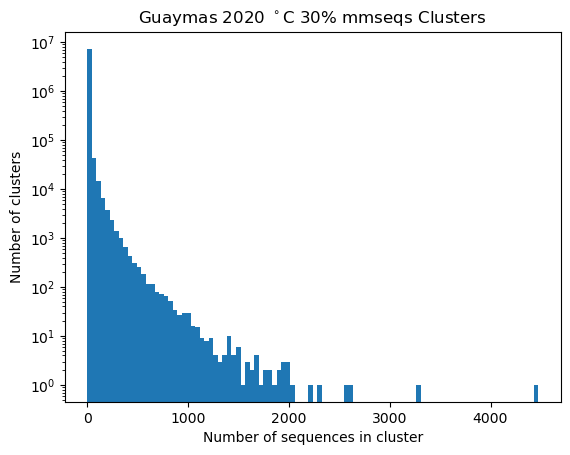

In [4]:
#Plot histogram of the number of sequences in each cluster
plt.hist(cluster_counts[1], bins=100)
#Make y axis log scale
plt.yscale('log')
plt.xlabel('Number of sequences in cluster')
plt.ylabel('Number of clusters')
plt.title('Guaymas 2020 $^\circ$C 30% mmseqs Clusters ')
#plt.show()
#Write plot to png
plt.savefig('data/Guaymas2020_30mmseqs_clusters_histogram_05012024.png')


In [5]:
cluster_counts.shape

(7368354, 1)

In [7]:
#Want to find the GuapO cluster, GuaPO is D4993_C5_H4_Bin_238_scaffold_20386_9
clusters[clusters[1].str.contains('D4993_C5_H4_Bin_238_scaffold_20386_9')] #GuaPO is in this cluster: D4994_C39_H1-scaffold_122948_1_89

,0,1
7686953,D4994_C39_H1-scaffold_122948_1_89,D4993_C5_H4_Bin_238_scaffold_20386_9_39


In [8]:
#Read in graph!
G = gml.read_gml('data/GRAPH_ALL_Guaymas2020_hottest_clu30_May62024.gml')

In [12]:
#Get me an ego graph!!
Guapo_G = nx.ego_graph(G, 'D4994_C39_H1-scaffold_122948_1', radius=4)

In [13]:
#Write out smol graph to tsvs for cosmograph! 
output_nodes_tsv = 'data/GuaPO_clu30_nodes.tsv'
output_edges_tsv = 'data/GuaPO_clu30_edges.tsv'

with open(output_nodes_tsv, 'w') as node_file:
    node_file.write("NodeId\tlabel\n")  # Modify based on your node attributes
    for node, data in Guapo_G.nodes(data=True):
        # Write node and attributes to the file, ensure attributes match what's in your graph
        node_file.write(f"{node}\t{data.get('label', '')}\n")
print(f'saved nodes to {output_nodes_tsv}')
# Open a file to write the edge data
with open(output_edges_tsv, 'w') as edge_file:
    edge_file.write("Source\tTarget\tWeight\n")  # Modify if you have different or additional attributes
    for source, target, data in Guapo_G.edges(data=True):
        # Write edge and attributes to the file, ensure attributes match what's in your graph
        edge_file.write(f"{source}\t{target}\t{data.get('weight', '')}\n")
print(f'saved edges to {output_edges_tsv}')

saved nodes to data/GuaPO_clu30_nodes.tsv
saved edges to data/GuaPO_clu30_edges.tsv


### Export .gml to .tsv

In [ ]:
#Should we do this for the full set of Guaymas? Let's move forward with these for now and see how it goes.
import networkx as nx

# Load the graph from a GML file
g = nx.read_gml('path_to_your_file.gml')

# Open a TSV file to write the edge list
with open('edges.tsv', 'w') as file:
    # Optionally write headers (e.g., source, target)
    file.write("source\ttarget\n")
    for edge in g.edges():
        # Write each edge as a row in the TSV
        file.write(f"{edge[0]}\t{edge[1]}\n")
